In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
runnum = 11
endyear = 2021
h5_location = './../runs/run{}.h5'.format(runnum)

In [3]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [4]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [5]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [6]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [7]:
total

,2016,2017,2018,2019,2020,2021
5,NaN,22,13,NaN,NaN,NaN
3,NaN,106,25,91.0,152.0,148.0
125,545.0,1209,979,826.0,913.0,697.0
99,NaN,266,190,315.0,249.0,321.0
161,178.0,304,293,281.0,429.0,451.0
115,NaN,14,14,NaN,2.0,20.0
147,NaN,18,2,42.0,43.0,45.0
93,42.0,199,296,169.0,271.0,229.0


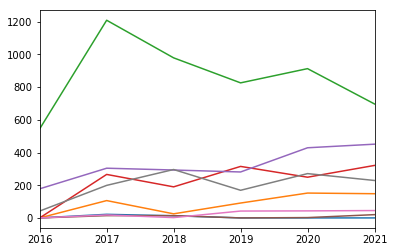

In [8]:
for l in lids:
    total.fillna(0).loc[l].plot()

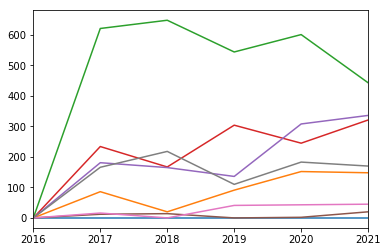

In [9]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot()

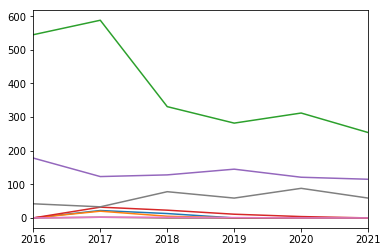

In [10]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot()

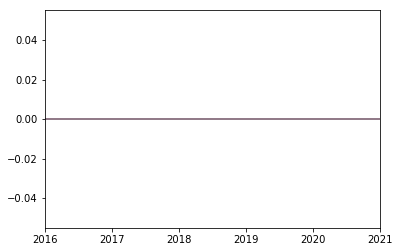

In [11]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot()

In [12]:
b2020 = store['2020/buildings']

In [13]:
b2020.year_built.value_counts(sort=False)

0       379454
1644         2
1656         2
1690         1
1760         1
1780         2
1790         5
1791         1
1795         4
1800       215
1803         8
9999        19
1805         2
1806         2
1807         1
1808         8
1810        22
1811         8
1812         1
1813         1
1814         1
1816         2
1818         5
1819         5
1820        42
1821        16
1822        21
1823        15
1824         8
1825        19
         ...  
1991     13862
1992     13810
1993     14123
1994     16231
1995     17118
1996     18991
1997     19412
1998     20308
1999     19937
2000     19952
2001     16667
2002     16128
2003     16197
2004     15405
2005     13430
2006      7679
2007      4179
2008       316
2009       192
2010      2309
2011      3010
2012      4265
2013      5693
2014      5030
2015      5146
2016       765
2017      2138
2018      1812
2019      1724
2020      2059
Name: year_built, Length: 225, dtype: int64